# Part1: Define encoders

# Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum
from models.encoders import TimeToFirstSpikeEncoder, NumberEncoder, PoissonEncoder, FeedDataset
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution
from simulate import Simulation
from utils.images import CustomImage


# 1- Time to first spike

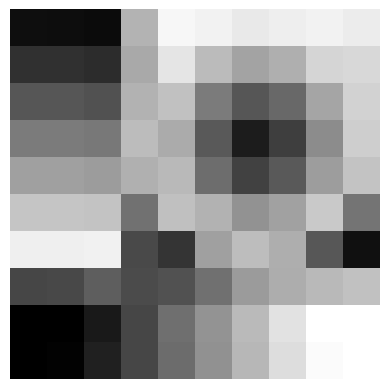

In [2]:
img1 = CustomImage('dataset/slope.tif')
img1.resize_image(10, 10)
img1.img_show()

In [3]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = TimeToFirstSpikeEncoder(dataset=[img1.img2tensor()],
                                 duration=50,
                                 theta=1)

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x78a528a41210>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
200xBatch: 1/1 (100%) 122.687ms


/home/amir/Documents/university/Semester 8/Neuroscience/hw3/models/encoders.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  self.dataset = torch.tensor(self.dataset)


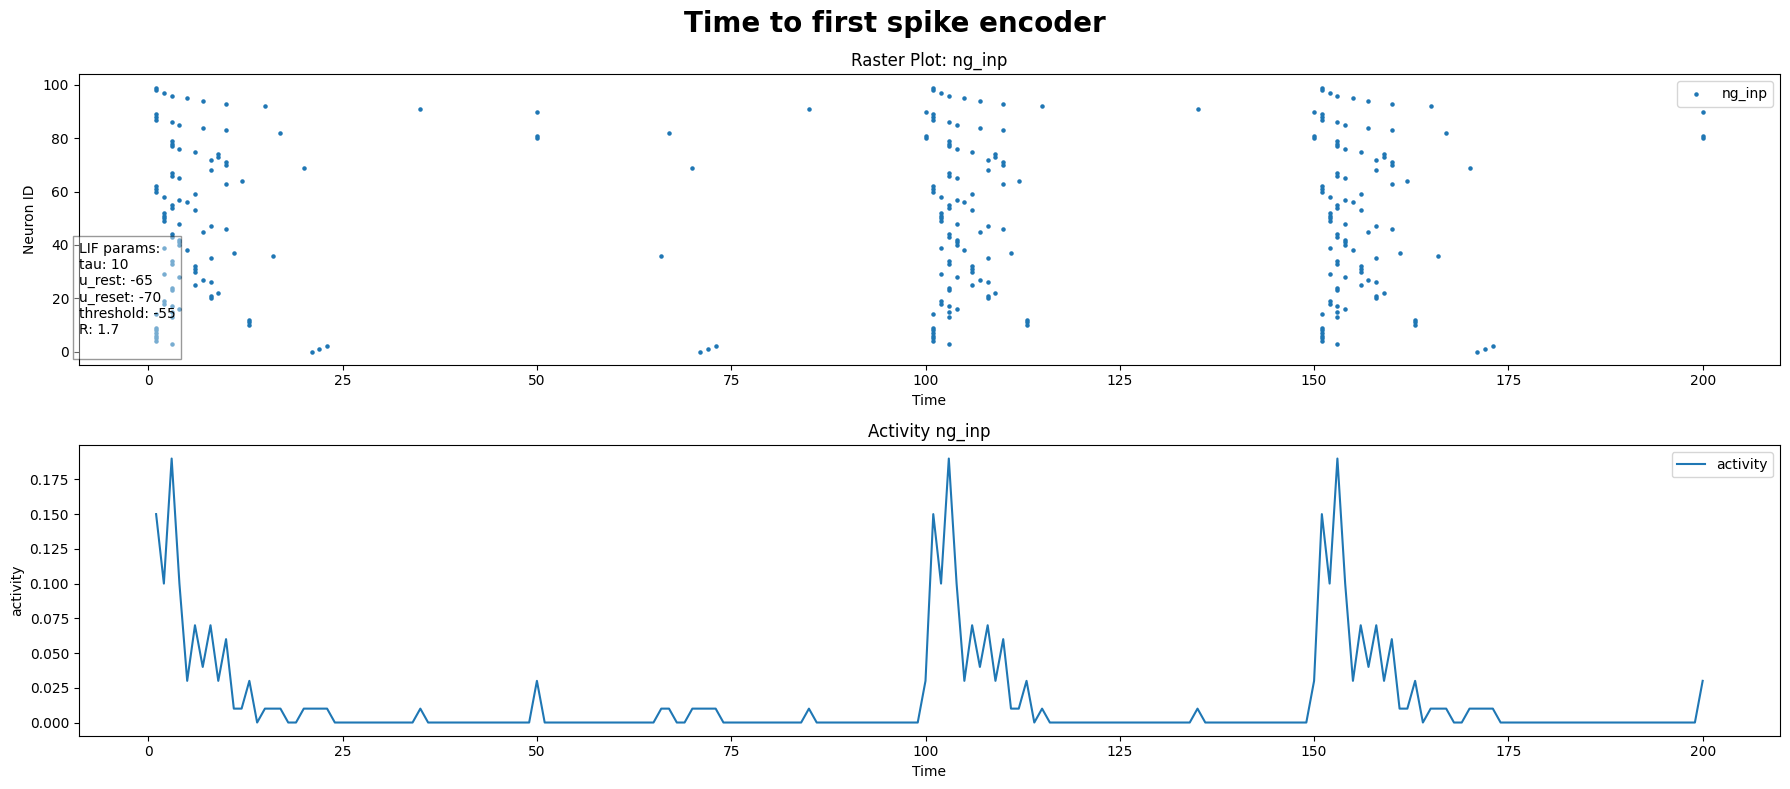

In [4]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))



ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
ng_inp.add_neuron_model_params_info(ax1, model_idx=6)

# ng1.add_current_params_info(axs[1], current_idx=2)
ax2 = fig.add_subplot(2, 1, 2)
ng_inp.add_activity_plot(ax2)

# ax3 = fig.add_subplot(3, 1, 3)
# ax3.axis('off')

fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

# 2- Number Encoder(using normal distribution)

In [5]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = NumberEncoder(dataset=[4.7],
                                 duration=20)

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=21)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.NumberEncoder object at 0x78a528a2cc10>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
21xBatch: 1/1 (100%) 16.521ms


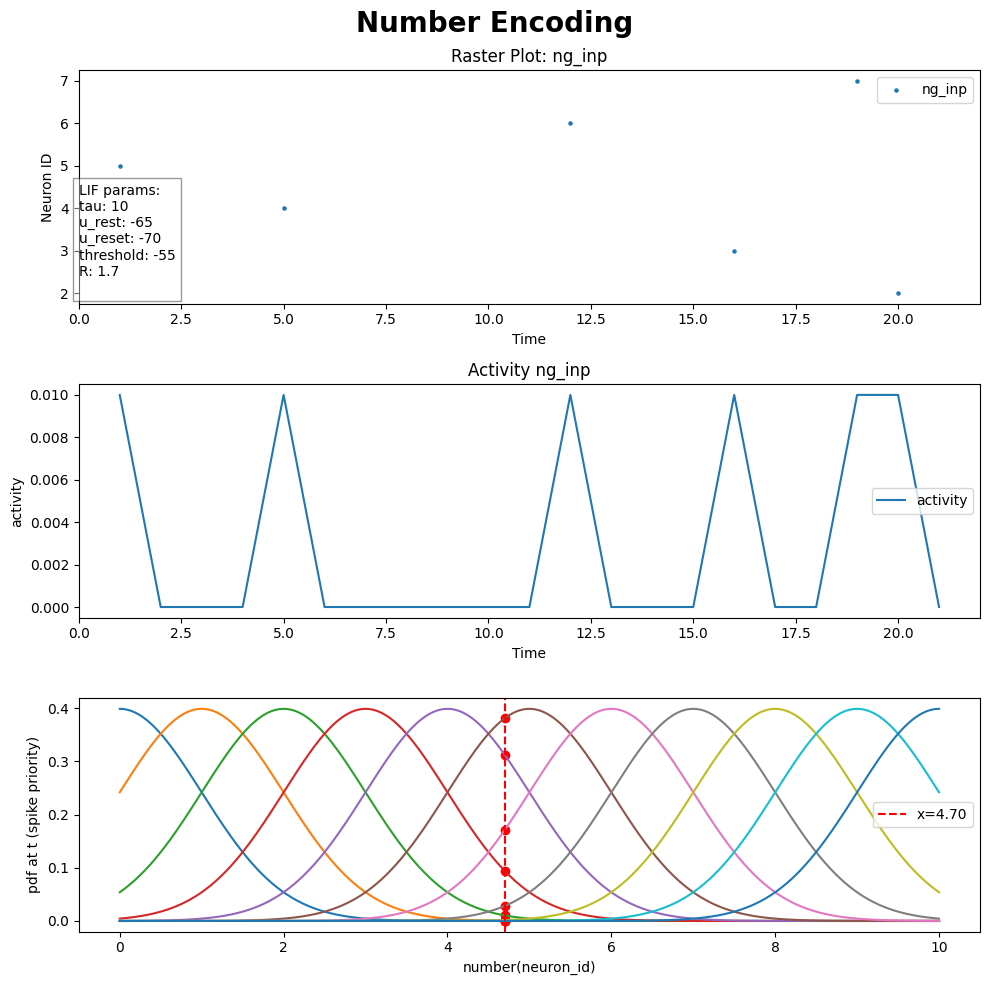

In [6]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
ng_inp.add_neuron_model_params_info(ax1, model_idx=6)


ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng_inp.add_activity_plot(ax2)

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, first plot
encoded_dataset.plot_x(ax3)


fig.suptitle("Number Encoding", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

# 3-Poisson Encoding

In [7]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = PoissonEncoder(dataset=[[200, 60, 30, 10 , 0]],
                                 duration=50,
                                 )

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=60)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.PoissonEncoder object at 0x78a526696f10>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
60xBatch: 1/1 (100%) 30.897ms


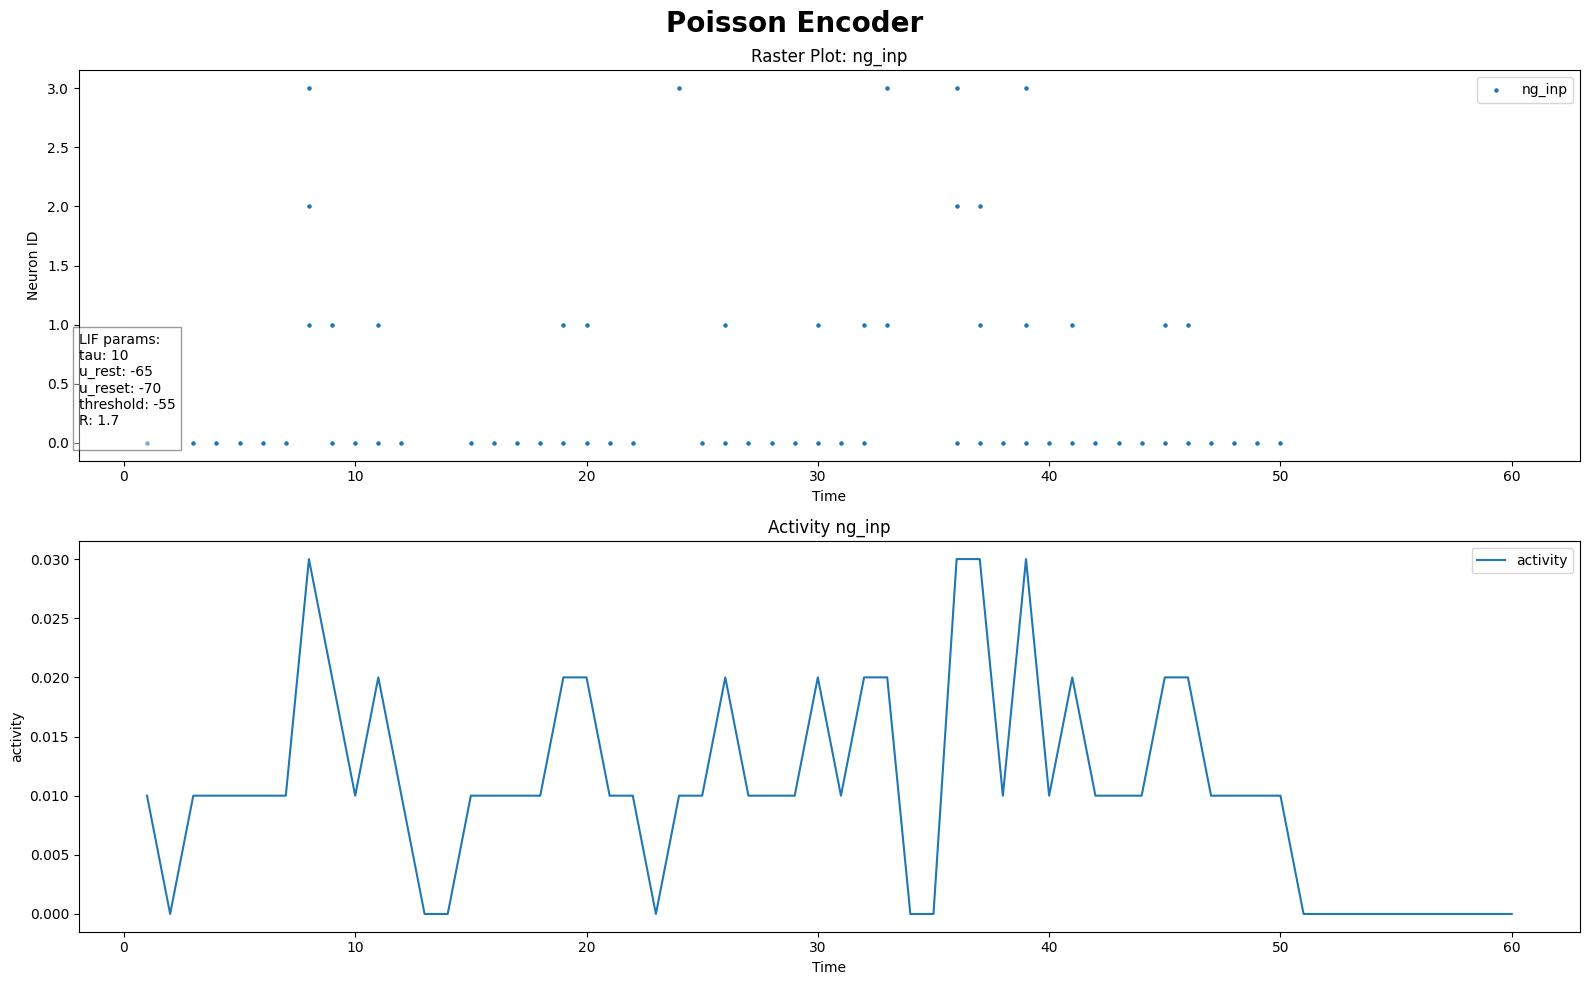

In [8]:
# fig, axs = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(16, 10))

# ng1.add_neuron_model_params_info(ax1, model_idx=7)

ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
ng_inp.add_neuron_model_params_info(ax1, model_idx=6)

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng_inp.add_activity_plot(ax2)

fig.suptitle("Poisson Encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()